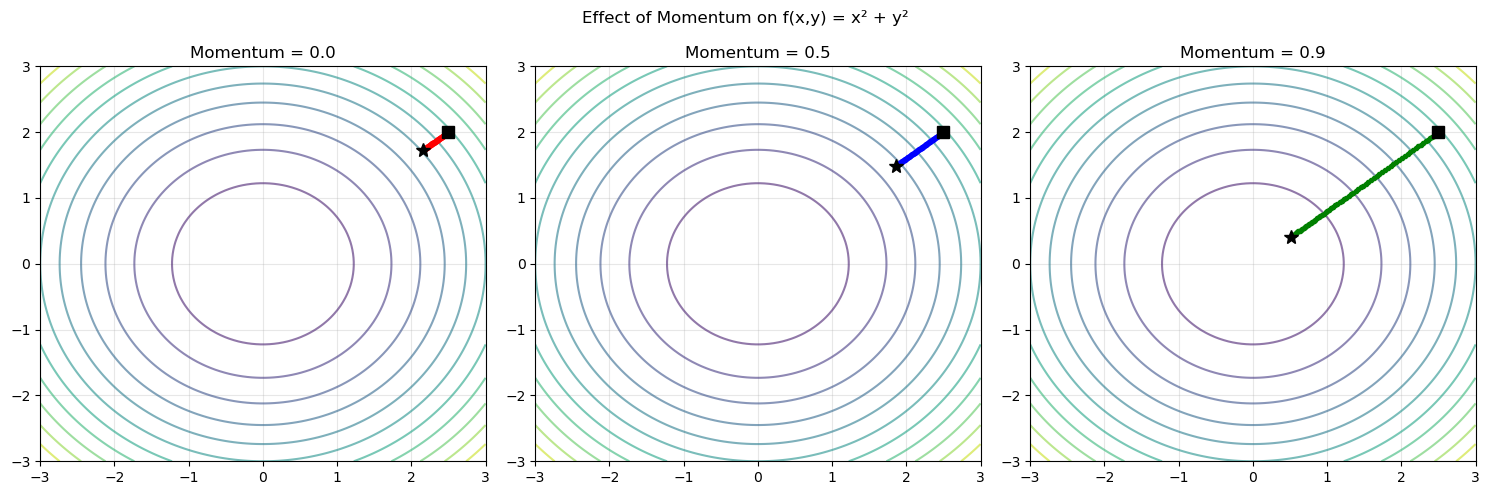

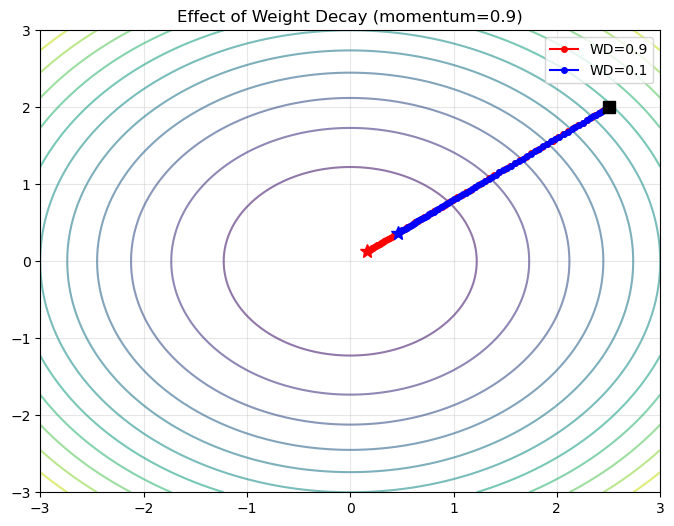

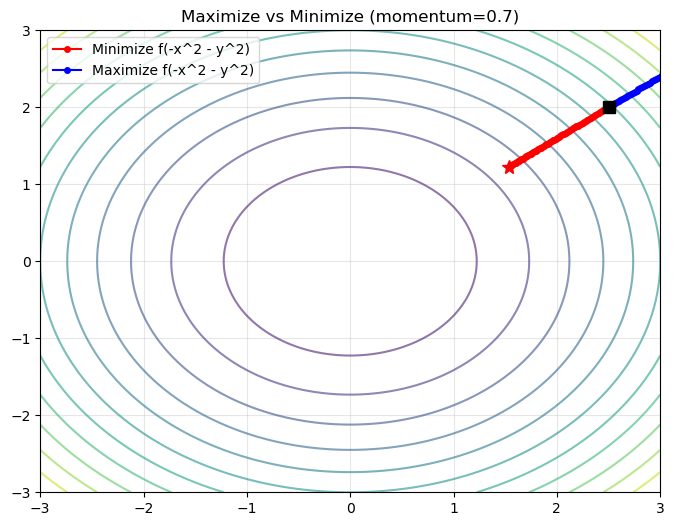

In [5]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np



def f_min(x, y): 
    return x**2 + y**2

def f_max(x, y): 
    return -x**2 - y**2

def optimize_2d(func, start_x=2.5, start_y=2.0, momentum=0, weight_decay=0, maximize=False, steps=75):
    x = torch.tensor(start_x, requires_grad=True)
    y = torch.tensor(start_y, requires_grad=True)
    optimizer = optim.SGD([x, y], momentum=momentum, weight_decay=weight_decay, maximize=maximize)
    
    path = []
    for _ in range(steps):
        optimizer.zero_grad()
        loss = func(x, y)
        
        loss.backward()

        path.append([x.item(), y.item()])
        optimizer.step()
    

    return np.array(path)


x_range = np.linspace(-3, 3, 100)
y_range = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = X**2 + Y**2 
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

momentum_vals = [0.0, 0.5, 0.9]
colors = ['red', 'blue', 'green']

for i, mom in enumerate(momentum_vals):
    path = optimize_2d(f_min, momentum=mom)
    
    axes[i].contour(X, Y, Z, levels=15, alpha=0.6)
    axes[i].plot(path[:, 0], path[:, 1], 'o-', color=colors[i], markersize=3)
    axes[i].plot(path[0, 0], path[0, 1], 's', color='black', markersize=8)  # start
    axes[i].plot(path[-1, 0], path[-1, 1], '*', color='black', markersize=10)  # end
    axes[i].set_title(f'Momentum = {mom}')
    axes[i].set_xlim(-3, 3)
    axes[i].set_ylim(-3, 3)
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Effect of Momentum on f(x,y) = x² + y²')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
path_no_wd = optimize_2d(f_min, momentum=0.9, weight_decay=0.9)
path_with_wd = optimize_2d(f_min, momentum=0.9, weight_decay=0.1)
ax.contour(X, Y, Z, levels=15, alpha=0.6)
ax.plot(path_no_wd[:, 0], path_no_wd[:, 1], 'o-', color='red', label='WD=0.9', markersize=4)
ax.plot(path_with_wd[:, 0], path_with_wd[:, 1], 'o-', color='blue', label='WD=0.1', markersize=4)
ax.plot(path_no_wd[0, 0], path_no_wd[0, 1], 's', color='black', markersize=8)
ax.plot(path_no_wd[-1, 0], path_no_wd[-1, 1], '*', color='red', markersize=10)
ax.plot(path_with_wd[-1, 0], path_with_wd[-1, 1], '*', color='blue', markersize=10)
ax.set_title('Effect of Weight Decay (momentum=0.9)')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

path_minimize = optimize_2d(f_min, momentum=0.7, maximize=False)
path_maximize = optimize_2d(f_min, momentum=0.7, maximize=True)

ax.contour(X, Y, Z, levels=15, alpha=0.6)
ax.plot(path_minimize[:, 0], path_minimize[:, 1], 'o-', color='red', 
        label='Minimize f(-x^2 - y^2)', markersize=4)
ax.plot(path_maximize[:, 0], path_maximize[:, 1], 'o-', color='blue', 
        label='Maximize f(-x^2 - y^2)', markersize=4)

ax.plot(path_minimize[0, 0], path_minimize[0, 1], 's', color='black', markersize=8)
ax.plot(path_minimize[-1, 0], path_minimize[-1, 1], '*', color='red', markersize=10)
ax.plot(path_maximize[-1, 0], path_maximize[-1, 1], '*', color='blue', markersize=10)

ax.set_title('Maximize vs Minimize (momentum=0.7)')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()
